In [5]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from utils.task_config import task_config
from analysis_utils.load_scores import *
from utils.load_task import load_test_split, format_data

## accuracies

In [6]:
all_scores, em = accuracy_facts()
em_df = pd.DataFrame(em)
display(em_df)

,arithmetics_addition,elements_number_from_element,elements_number_from_position,olympics_hundred_meters,olympics_downhill,writers_english,writers_german,writers_italian,writers_dutch,writers_swedish,companies_us,companies_de,companies_it,companies_nl,companies_sv
en,99.4,100.00,37.78,55.41,37.61,90.32,78.49,67.74,76.88,67.74,89.0,86.0,61.0,75.0,80.0
en-paraphrase,98.6,100.00,42.22,54.05,31.62,90.32,79.57,67.20,75.27,68.82,87.0,84.0,62.0,65.0,82.0
de_from_en,45.2,98.89,40.00,50.68,35.04,89.78,80.65,67.20,79.57,66.67,84.0,85.0,60.0,71.0,77.0
it_from_en,44.0,100.00,36.67,51.35,35.04,90.32,79.03,65.59,76.88,64.52,80.0,79.0,64.0,69.0,76.0
nl_from_en,42.4,100.00,36.67,52.03,35.04,90.86,78.49,68.28,81.18,65.05,82.0,78.0,59.0,71.0,76.0
sv_from_en,19.2,100.00,41.11,50.68,33.33,86.02,77.96,62.90,75.27,69.35,83.0,78.0,56.0,65.0,77.0


In [7]:
display(em_df.aggregate("mean", axis=1))

en               73.491333
en-paraphrase    72.511333
de_from_en       68.712000
it_from_en       67.426667
nl_from_en       67.733333
sv_from_en       64.988000
dtype: float64

In [8]:
writers_df = em_df[["writers_english", "writers_german", "writers_italian", "writers_dutch", "writers_swedish"]]
companies_df = em_df[["companies_us", "companies_de", "companies_it", "companies_nl", "companies_sv"]]
display(writers_df.aggregate("mean", axis=1), companies_df.aggregate("mean", axis=1))

en               76.234
en-paraphrase    76.236
de_from_en       76.774
it_from_en       75.268
nl_from_en       76.772
sv_from_en       74.300
dtype: float64

en               78.2
en-paraphrase    76.0
de_from_en       75.4
it_from_en       73.6
nl_from_en       73.2
sv_from_en       71.8
dtype: float64

#### accuracies en 2nd run

In [9]:
_, em_en_2nd = accuracy_facts(languages=["en_2nd_run"])
em_en_2nd_df = pd.DataFrame(em_en_2nd)
display(em_en_2nd_df)

,arithmetics_addition,elements_number_from_element,elements_number_from_position,olympics_hundred_meters,olympics_downhill,writers_english,writers_german,writers_italian,writers_dutch,writers_swedish,companies_us,companies_de,companies_it,companies_nl,companies_sv
en_2nd_run,99.4,100.0,37.78,54.73,34.19,90.32,78.49,67.2,75.27,66.67,88.0,87.0,62.0,73.0,80.0


In [10]:
writers_2nd_run_df = em_en_2nd_df[["writers_english", "writers_german", "writers_italian", "writers_dutch", "writers_swedish"]]
companies_2nd_run_df = em_en_2nd_df[["companies_us", "companies_de", "companies_it", "companies_nl", "companies_sv"]]
print(writers_2nd_run_df.aggregate("mean", axis=1), "\n", companies_2nd_run_df.aggregate("mean", axis=1))

en_2nd_run    75.59
dtype: float64 
 en_2nd_run    78.0
dtype: float64


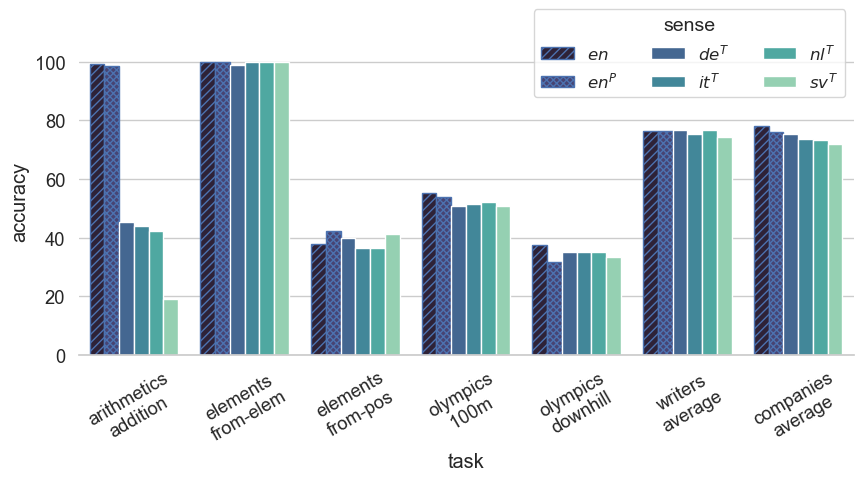

In [11]:
# plot

acc_df = make_aggregate_df_from_table(em, score="accuracy")

sns.set(font_scale=1.2)
sns.set_style("whitegrid")
plt.figure(figsize=(10,4))
p = sns.color_palette('mako') 
ax = sns.barplot(data=acc_df, y="accuracy", x="task", hue="language", palette=p) #"muted")#, alpha=0.5, size=10, marker="o")
plt.xticks(ticks=np.array([0, 1, 2, 3, 4, 5, 6]), 
           labels=["arithmetics\naddition", "elements\nfrom-elem", "elements\nfrom-pos", 
                   "olympics\n100m", "olympics\ndownhill", "writers\naverage", "companies\naverage"], 
           rotation=30)

sns.despine(left=True, right=True, top=True, bottom=False)

# Update the hatches
for i, bars in enumerate(ax.containers):
    for bar in bars:
        if i%6 == 0:
            bar.set_hatch('////')
            bar.set_edgecolor('b')
        elif i%6 == 1:
            bar.set_hatch(5*'x')
            bar.set_edgecolor('b')
            
handles, labels = ax.get_legend_handles_labels()
labels = ["$en$", "$en^P$", "$de^T$", "$it^T$", "$nl^T$", "$sv^T$"]

legend = ax.legend(handles=handles, labels=labels, title="sense", ncol=3, 
                   loc='upper right', bbox_to_anchor=(1,1.15), fontsize=12)
plt.setp(legend.get_title(), fontsize=14)
plt.show()

#### differences containment versus em

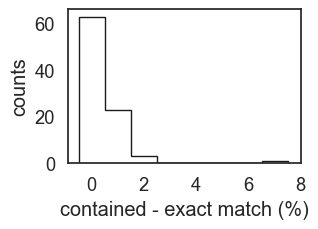

In [12]:
sns.set_style("white")
differences = []
for c, t in collection_task_all["facts"]:
    for language in ["en", "en-paraphrase", "de_from_en", "it_from_en", "nl_from_en", "sv_from_en"]:
        delta = all_scores[c + "_" + t][language]["contained"] - all_scores[c + "_" + t][language]["exact_match"]
        differences.append(delta)
        
counts, bins = np.histogram(differences, bins=np.arange(-0.5, 8, 1))
plt.figure(figsize=(3,2))
plt.stairs(counts, bins, fill=False, color="k")
plt.ylabel("counts")
plt.xlabel("contained - exact match (%)")
plt.xticks(ticks=[0, 2, 4, 6, 8])
plt.yticks(ticks=[0, 20, 40, 60])
plt.show()

## consistency

In [13]:
consistency = consistency_facts()
consistency_df = pd.DataFrame(consistency)
display(consistency_df)

,arithmetics_addition,elements_number_from_element,elements_number_from_position,olympics_hundred_meters,olympics_downhill,writers_english,writers_german,writers_italian,writers_dutch,writers_swedish,companies_us,companies_de,companies_it,companies_nl,companies_sv
en_2nd_run,100.0,100.00,91.11,90.54,88.89,98.39,90.32,81.18,82.80,82.80,98.0,98.0,97.0,95.0,99.0
en-paraphrase,99.0,100.00,77.78,82.43,61.54,95.16,88.17,76.34,78.49,75.27,97.0,95.0,87.0,84.0,93.0
de_from_en,45.0,98.89,71.11,80.41,76.92,94.09,85.48,72.04,81.72,72.58,94.0,91.0,82.0,88.0,92.0
it_from_en,44.2,100.00,70.00,75.68,70.09,96.24,87.63,70.43,78.49,73.12,88.0,87.0,84.0,82.0,91.0
nl_from_en,42.2,100.00,67.78,83.78,64.10,93.55,82.26,72.58,77.42,69.89,92.0,86.0,88.0,85.0,93.0
sv_from_en,19.4,100.00,70.00,83.78,59.83,90.32,83.33,66.13,75.27,71.51,89.0,86.0,80.0,78.0,91.0


In [10]:
display(consistency_df.aggregate("mean", axis=1))

en_2nd_run       92.868667
en-paraphrase    86.012000
de_from_en       81.682667
it_from_en       79.858667
nl_from_en       79.837333
sv_from_en       76.238000
dtype: float64

In [11]:
companies_df = consistency_df[["companies_us", "companies_de", "companies_it", "companies_nl", "companies_sv"]]
writers_df = consistency_df[["writers_english", "writers_german", "writers_italian", "writers_dutch", "writers_swedish"]]
display(writers_df.aggregate("mean", axis=1), companies_df.aggregate("mean", axis=1))

en_2nd_run       87.098
en-paraphrase    82.686
de_from_en       81.182
it_from_en       81.182
nl_from_en       79.140
sv_from_en       77.312
dtype: float64

en_2nd_run       97.4
en-paraphrase    91.2
de_from_en       89.4
it_from_en       86.4
nl_from_en       88.8
sv_from_en       84.8
dtype: float64

In [14]:
# plot
consistency_df = make_aggregate_df_from_table(consistency, score="consistency")

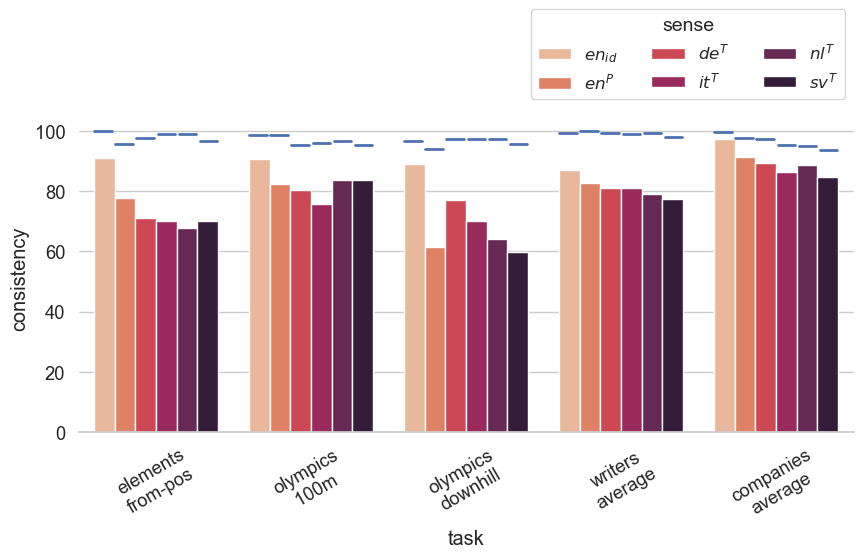

In [15]:
plot_tasks = acc_df['task'].unique()[2:]
filtered_df = consistency_df[consistency_df['task'].isin(plot_tasks)]

sns.set(font_scale=1.2)
figsize=(10,4)
n_tasks = len(plot_tasks)
sns.set_style("whitegrid")
plt.figure(figsize=figsize)
p = sns.color_palette('rocket_r') 
ax = sns.barplot(data=filtered_df, y="consistency", x="task", hue="language", palette=p) #"muted")#, alpha=0.5, size=10, marker="o")
plt.xticks(ticks=range(n_tasks), 
           labels=["elements\nfrom-pos", "olympics\n100m", "olympics\ndownhill", "writers\naverage", 
                   "companies\naverage"], 
           rotation=30)

sns.despine(left=True, right=True, top=True, bottom=False)

# Loop over df to add upper- and lower accuracy lines
linecolor='white'   # Find correct RGB, beige may be nicer
bar_width = ax.patches[0].get_width()/n_tasks

# get bar x coordinates
bar_coords = []
for bar in ax.patches:
    bar_coords.append(bar.get_x()/figsize[1])

# print(bar_coords)

for i, task in enumerate(plot_tasks):
    # Get base accuracy
    acc_base = acc_df[(acc_df['task']==task) & (acc_df['language'] == 'en')]['accuracy'].iloc[0]
    for j, language in enumerate(consistency_df['language'].unique()):
        
        if language == 'en_2nd_run':
            acc2 = {'elements_number_from_position': 37.78, 
                    'olympics_hundred_meters': 54.05,
                    'olympics_downhill': 34.19,
                    'writers': 75.59,
                    'companies': 78.0}[task]
        else: 
            acc2 = acc_df[(acc_df['task']==task) & (acc_df['language'] == language)]['accuracy'].iloc[0]

        # Compute values and plot them
        # NB this is an overestimation which assumes that 
        # Answers that are both wrong are inconsistent
        max_consistency = fully_consistent(acc_base, acc2)
        xmin = 0.02+i/n_tasks+j*bar_width*1.025
        plt.axhline(y=max_consistency, xmin=xmin, xmax=xmin+bar_width*0.85, linewidth=2)

# plt.axhline(y=0.2, xmin=-0.1, xmax=xmin+bar_width, linewidth=2)
handles, labels = ax.get_legend_handles_labels()
labels = ["$en_{id}$", "$en^P$", "$de^T$", "$it^T$", "$nl^T$", "$sv^T$"]

legend = ax.legend(handles=handles, labels=labels, title="sense", ncol=3, 
                   loc='upper right', bbox_to_anchor=(1,1.4), fontsize=12)
plt.setp(legend.get_title(), fontsize=14)
plt.show()

## advantage for language-specific information

In [16]:
em_writers_same = []
em_writers_different = []
em_companies_same = []
em_companies_different = []

for language in ["en", "de_from_en", "nl_from_en", "it_from_en", "sv_from_en"]:
    
    writers_mapping = {"english": "en", "german": "de", "italian": "it", "swedish": "sv", "dutch": "nl"}
    companies_mapping = {"us": "en", "de": "de", "it": "it", "sv": "sv", "nl": "nl"}
    
    for subtask in ["english", "german", "italian", "dutch", "swedish"]: 
        
        if writers_mapping[subtask] == language.split("_")[0]:
            em_writers_same.append(em["writers_" + subtask][language])
        else:
            em_writers_different.append(em["writers_" + subtask][language])
    
    for subtask in ["us", "de", "it", "nl", "sv"]:
        if companies_mapping[subtask] == language.split("_")[0]:
            em_companies_same.append(em["companies_" + subtask][language])
        else:
            em_companies_different.append(em["companies_" + subtask][language])

In [17]:
writers_deviation_from_mean = {"language": [], "subtask": [], "deviation from mean": []}
companies_deviation_from_mean = {"language": [], "subtask": [], "deviation from mean": []}

for language in ["en", "de_from_en", "nl_from_en", "it_from_en", "sv_from_en"]:
    
    writers_mapping = {"english": "en", "german": "de", "italian": "it", "swedish": "sv", "dutch": "nl"}
    companies_mapping = {"us": "american", "de": "german", "it": "italian", "sv": "swedish", "nl": "dutch"}
    
    for subtask in ["english", "german", "italian", "dutch", "swedish"]:
        
        mean = np.mean(list(em["writers_" + subtask].values()))
        writers_deviation_from_mean["language"].append(language.split("_")[0])
        writers_deviation_from_mean["subtask"].append(subtask)
        writers_deviation_from_mean["deviation from mean"].append(em["writers_" + subtask][language] - mean)
        
    
    for subtask in ["us", "de", "it", "nl", "sv"]:
        subtask_name = {"us": "american", "de": "german", "it": "italian", "nl": "dutch", "sv": "swedish"}[subtask]
        
        mean = np.mean(list(em["companies_" + subtask].values()))
        companies_deviation_from_mean["language"].append(language.split("_")[0])
        companies_deviation_from_mean["subtask"].append(subtask_name)
        companies_deviation_from_mean["deviation from mean"].append(em["companies_" + subtask][language] - mean)
    

In [18]:
collapsed_writers = {"language": [], "subtask": [], "deviation from mean": []}
mapping = {"english": "en", "german": "de", "dutch": "nl", "italian": "it", "swedish": "sv"}

for i in range(25):
    subtask = writers_deviation_from_mean["subtask"][i]
    language = writers_deviation_from_mean["language"][i]
    collapsed_writers["language"].append(language)
    if mapping[subtask] == language:
        collapsed_writers["subtask"].append("same")
    else:
        collapsed_writers["subtask"].append("different")
    collapsed_writers["deviation from mean"].append(writers_deviation_from_mean["deviation from mean"][i])

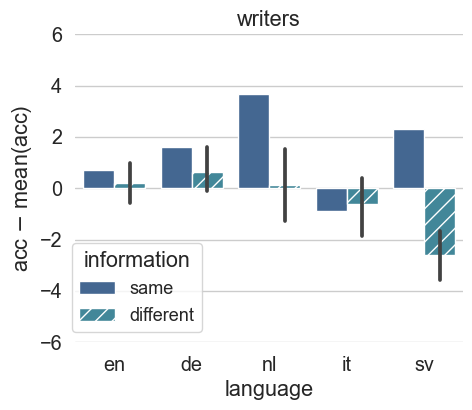

In [31]:
plt.figure(figsize=(5,4))
sns.set(font_scale=1.3)
sns.set_style("whitegrid")
p = sns.color_palette('mako') 
plot = sns.barplot(data=pd.DataFrame(collapsed_writers), x="language", y="deviation from mean", hue="subtask", 
                   palette=p[2:])
plt.title("writers")
hatches = ["", "//"]
# Loop over the bars
for bars, hatch in zip(plot.containers, hatches):
    # Set a different hatch for each group of bars
    for bar in bars:
        bar.set_hatch(hatch)
plt.ylabel("acc $-$ mean(acc)")
plt.legend(title="information", fontsize="small", bbox_to_anchor=(0.35,0.35))
plt.yticks([-6, -4, -2, 0, 2, 4, 6])
sns.despine(left=True, right=True, top=True, bottom=True)
plt.show()

In [19]:
collapsed_companies = {"language": [], "subtask": [], "deviation from mean": []}
mapping = {"american": "en", "german": "de", "dutch": "nl", "italian": "it", "swedish": "sv"}

for i in range(25):
    subtask = companies_deviation_from_mean["subtask"][i]
    language = companies_deviation_from_mean["language"][i]
    collapsed_companies["language"].append(language)
    if mapping[subtask] == language:
        collapsed_companies["subtask"].append("same")
    else:
        collapsed_companies["subtask"].append("different")
    collapsed_companies["deviation from mean"].append(companies_deviation_from_mean["deviation from mean"][i])

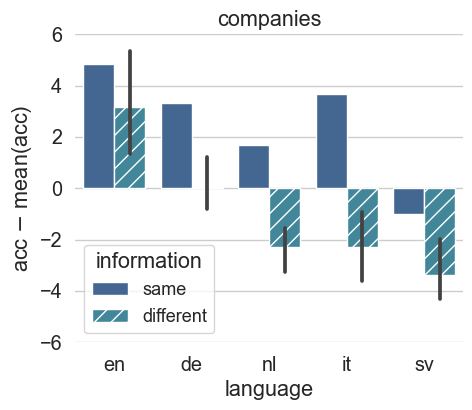

In [33]:
plt.figure(figsize=(5,4))
sns.set(font_scale=1.3)
sns.set_style("whitegrid")
plot = sns.barplot(data=pd.DataFrame(collapsed_companies), x="language", y="deviation from mean", hue="subtask", 
                   palette=p[2:])
plt.title("companies")
hatches = ["", "//"]
for bars, hatch in zip(plot.containers, hatches):
    for bar in bars:
        bar.set_hatch(hatch)
plt.yticks([-6, -4, -2, 0, 2, 4, 6])
plt.ylabel("acc $-$ mean(acc)")
plt.legend(title="information", fontsize="small")
sns.despine(top=True, bottom=True, left=True, right=True)
plt.show()

In [20]:
same = []
different = []

d1 = pd.DataFrame(writers_deviation_from_mean)
d2 = pd.DataFrame(companies_deviation_from_mean)

for i, language in enumerate(["en", "de", "it", "nl", "sv"]):
    for j, information in enumerate(["english", "german", "italian", "dutch", "swedish"]):
        value_writers = d1[(d1["language"] == language) & (d1["subtask"] == information)]["deviation from mean"].iloc[0]
        mapping = "american" if information == "english" else information
        value_companies = d2[(d2["language"] == language) & (d2["subtask"] == mapping)]["deviation from mean"].iloc[0]
        if i == j:
            same.append(value_writers)
            same.append(value_companies)
        else:
            different.append(value_writers)
            different.append(value_companies)

In [21]:
from scipy.stats import ttest_ind as ttest

In [26]:
ttest(same, different)

Ttest_indResult(statistic=3.4417426174022334, pvalue=0.0012070463833898407)

## relationship consistent correct, consistent incorrect

In [22]:
def get_conditional_consistency(consistency, correct_source):
    
    conditional_consistency = {"task": [], "language": [], "consistency": [], "correct": []}

    
    for collection, task in collection_task_all["facts"]:
        
        for language in ["en_2nd_run", "en-paraphrase", "de_from_en", "it_from_en", "nl_from_en", "sv_from_en"]:
            
            consistency_tmp = consistency[collection + "_" + task][language]
            correct_src_tmp = correct_source[collection + "_" + task][language]
            
            n = len(consistency_tmp)
            
            consistent_correct = np.mean([consistency_tmp[i] for i in range(n) if correct_src_tmp[i]])
            consistent_false = np.mean([consistency_tmp[i] for i in range(n) if not correct_src_tmp[i]])
            
            conditional_consistency["task"] += [collection+ "_" + task, collection+ "_" + task]
            conditional_consistency["language"] += [language, language]
            conditional_consistency["consistency"] += [consistent_correct, consistent_false]
            conditional_consistency["correct"] += ["correct", "incorrect"]

    return pd.DataFrame(conditional_consistency)

In [23]:
_, consistent, correct_src, correct_tgt = consistency_facts(get_details=True)

In [24]:
conditional_consistency = get_conditional_consistency(consistent, correct_src)

C:\Users\Xenia\Anaconda3\envs\chatgpt\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Xenia\Anaconda3\envs\chatgpt\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [25]:
conditional_consistency[conditional_consistency.task == "arithmetics_addition"]

,task,language,consistency,correct
0,arithmetics_addition,en_2nd_run,1.000000,correct
1,arithmetics_addition,en_2nd_run,1.000000,incorrect
2,arithmetics_addition,en-paraphrase,0.991952,correct
3,arithmetics_addition,en-paraphrase,0.666667,incorrect
4,arithmetics_addition,de_from_en,0.450704,correct
5,arithmetics_addition,de_from_en,0.333333,incorrect
6,arithmetics_addition,it_from_en,0.440644,correct
7,arithmetics_addition,it_from_en,0.666667,incorrect
8,arithmetics_addition,nl_from_en,0.424547,correct
9,arithmetics_addition,nl_from_en,0.000000,incorrect


In [26]:
conditional_consistency[conditional_consistency["task"] == "olympics_hundred_meters"]

,task,language,consistency,correct
36,olympics_hundred_meters,en_2nd_run,0.963415,correct
37,olympics_hundred_meters,en_2nd_run,0.833333,incorrect
38,olympics_hundred_meters,en-paraphrase,0.951220,correct
39,olympics_hundred_meters,en-paraphrase,0.666667,incorrect
40,olympics_hundred_meters,de_from_en,0.890244,correct
41,olympics_hundred_meters,de_from_en,0.696970,incorrect
42,olympics_hundred_meters,it_from_en,0.865854,correct
43,olympics_hundred_meters,it_from_en,0.621212,incorrect
44,olympics_hundred_meters,nl_from_en,0.902439,correct
45,olympics_hundred_meters,nl_from_en,0.757576,incorrect


In [27]:
conditional_consistency[conditional_consistency["task"] == "olympics_downhill"]

,task,language,consistency,correct
48,olympics_downhill,en_2nd_run,0.909091,correct
49,olympics_downhill,en_2nd_run,0.876712,incorrect
50,olympics_downhill,en-paraphrase,0.795455,correct
51,olympics_downhill,en-paraphrase,0.506849,incorrect
52,olympics_downhill,de_from_en,0.886364,correct
53,olympics_downhill,de_from_en,0.698630,incorrect
54,olympics_downhill,it_from_en,0.840909,correct
55,olympics_downhill,it_from_en,0.616438,incorrect
56,olympics_downhill,nl_from_en,0.772727,correct
57,olympics_downhill,nl_from_en,0.561644,incorrect


In [28]:
conditional_consistency[conditional_consistency["task"] == "elements_number_from_element"].head()

,task,language,consistency,correct
12,elements_number_from_element,en_2nd_run,1.000000,correct
13,elements_number_from_element,en_2nd_run,NaN,incorrect
14,elements_number_from_element,en-paraphrase,1.000000,correct
15,elements_number_from_element,en-paraphrase,NaN,incorrect
16,elements_number_from_element,de_from_en,0.988889,correct


In [35]:
conditional_consistency[conditional_consistency["task"] == "elements_number_from_position"]

,task,language,consistency,correct
24,elements_number_from_position,en_2nd_run,0.970588,correct
25,elements_number_from_position,en_2nd_run,0.875000,incorrect
26,elements_number_from_position,en-paraphrase,0.970588,correct
27,elements_number_from_position,en-paraphrase,0.660714,incorrect
28,elements_number_from_position,de_from_en,0.911765,correct
29,elements_number_from_position,de_from_en,0.589286,incorrect
30,elements_number_from_position,it_from_en,0.852941,correct
31,elements_number_from_position,it_from_en,0.607143,incorrect
32,elements_number_from_position,nl_from_en,0.852941,correct
33,elements_number_from_position,nl_from_en,0.571429,incorrect


In [29]:
companies_df = conditional_consistency[conditional_consistency["task"].isin(["companies_us", "companies_de", "companies_it", "companies_nl", "companies_sv"])]

In [30]:
writers_df = conditional_consistency[conditional_consistency["task"].isin(["writers_english", "writers_german", "writers_italian", "writers_dutch", "writers_swedish"])]

In [31]:
companies_avg = companies_df.groupby(['language', 'correct'], sort=False).mean(numeric_only=True)
print(companies_avg)

                         consistency
language      correct               
en_2nd_run    correct       0.989753
              incorrect     0.911862
en-paraphrase correct       0.941693
              incorrect     0.819965
de_from_en    correct       0.933615
              incorrect     0.756565
it_from_en    correct       0.914660
              incorrect     0.691074
nl_from_en    correct       0.921384
              incorrect     0.771078
sv_from_en    correct       0.888737
              incorrect     0.664966


In [32]:
writers_avg = writers_df.groupby(['language', 'correct'], sort=False).mean(numeric_only=True)
print(writers_avg)

                         consistency
language      correct               
en_2nd_run    correct       0.985496
              incorrect     0.552545
en-paraphrase correct       0.976538
              incorrect     0.375956
de_from_en    correct       0.973214
              incorrect     0.328941
it_from_en    correct       0.962470
              incorrect     0.374845
nl_from_en    correct       0.970483
              incorrect     0.242494
sv_from_en    correct       0.952142
              incorrect     0.245891


In [33]:
# Compute incorrect and correct 
display(acc_df)

def max_consistencies(acc1, acc2):
    # Compute the maximal consistencies for
    # correct and incorrect examples, given
    # the accuracies
    max_correct = (acc1 - max(acc1 - acc2, 0)) / acc1

    incor_en, incor_other = 100-acc1, 100-acc2
    
    max_incorrect = (incor_en - max(incor_en - incor_other, 0)) / incor_en
    return max_correct, max_incorrect

# Compute this per task
upper_bounds = {}
for task in acc_df['task'].unique()[2:]:
    upper_bounds[task] = {}
    incorr = []
    corr = []
    results_en = acc_df[(acc_df['task'] == task) & (acc_df['language'] == 'en')]['accuracy'].iloc[0]
    for condition in ['en-paraphrase', 'de_from_en', 'it_from_en', 'nl_from_en', 'sv_from_en']:
        results_condition = acc_df[(acc_df['task'] == task) & (acc_df['language'] == condition)]['accuracy'].iloc[0]
        max_corr, max_incorr = max_consistencies(results_en, results_condition)
        incorr.append(max_incorr)
        corr.append(max_corr)
    upper_bounds[task] = {'incorrect': sum(incorr)/len(incorr),
                               'correct': sum(corr)/len(corr)
                              }      

,task,language,accuracy
0,arithmetics_addition,en,99.400
1,arithmetics_addition,en-paraphrase,98.600
2,arithmetics_addition,de_from_en,45.200
3,arithmetics_addition,it_from_en,44.000
4,arithmetics_addition,nl_from_en,42.400
5,arithmetics_addition,sv_from_en,19.200
6,elements_number_from_element,en,100.000
7,elements_number_from_element,en-paraphrase,100.000
8,elements_number_from_element,de_from_en,98.890
9,elements_number_from_element,it_from_en,100.000


In [37]:
CC_new = conditional_consistency[conditional_consistency["task"].isin(["arithmetics_addition", 
                                                                       "elements_number_from_element", 
                                                                       "elements_number_from_position", 
                                                                       "olympics_hundred_meters",
                                                                       "olympics_downhill"]
                                                                     )].to_dict('list')

companies = companies_df.to_dict('list')
writers = writers_df.to_dict('list')

CC_new["task"] += ["writers"]*12 + ["companies"]*12
CC_new["language"] += CC_new["language"][0:24]
CC_new["correct"] += CC_new["correct"][0:24]
CC_new["consistency"] += list(writers_avg["consistency"].values) + list(companies_avg["consistency"].values) 

CC_new = pd.DataFrame(CC_new)

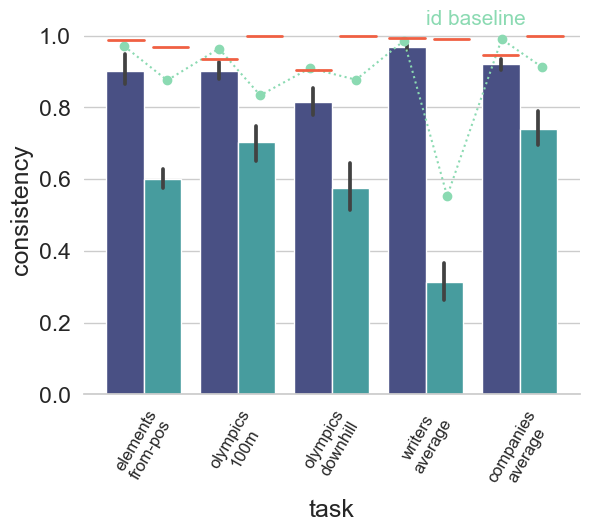

In [41]:
palette_name = "mako"
num_colors = 6

colors = sns.color_palette('rocket_r', n_colors=2)
line_color = colors[0]

# Get the color palette
colors = sns.color_palette(palette_name, n_colors=num_colors)

color1=colors[0]
color2=colors[5]

plot_tasks = acc_df['task'].unique()[2:]
filtered_df = acc_df[acc_df['task'].isin(plot_tasks)]

CC_new_f = CC_new[CC_new['task'].isin(plot_tasks)]

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

#plt.figure(figsize=(6,4))
xvals = [-0.21, 0.25, 0.80, 1.24, 1.77, 2.26, 2.77, 3.23, 3.81, 4.24]
ax1 = sns.barplot(data=CC_new_f[CC_new_f["language"]!="en_2nd_run"], x="task", y="consistency", hue="correct", palette="mako")
ax3 = plt.plot(xvals, CC_new_f[CC_new_f["language"]=="en_2nd_run"]["consistency"].values, linestyle="dotted", marker='o', color=color2)

# Add max consistencies
for i, task in enumerate(CC_new_f['task'].unique()):
    for j, condition in enumerate(['correct', 'incorrect']):
        xmin = 0.05 + i/5.3 + j*0.09
        xmax = xmin+1/14
        # print(i, j, task, condition, upper_bounds[task][condition])
        plt.axhline(y=upper_bounds[task][condition], xmin=xmin, xmax=xmax, linewidth=2, color=line_color)

sns.despine(left=True, right=True, top=True, bottom=False)
plt.legend([],[], frameon=False)

plt.xticks(ticks= range(len(plot_tasks)), labels=["elements\nfrom-pos", "olympics\n100m", "olympics\ndownhill", "writers\naverage", "companies\naverage"], fontsize=12, rotation=60)
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
plt.text(3, 1.03, "id baseline", fontsize=15, color=color2)
plt.ylim(0, 1.03)
plt.show()

In [43]:
display(conditional_consistency)

,task,language,consistency,correct
0,arithmetics_addition,en_2nd_run,1.000000,correct
1,arithmetics_addition,en_2nd_run,1.000000,incorrect
2,arithmetics_addition,en-paraphrase,0.991952,correct
3,arithmetics_addition,en-paraphrase,0.666667,incorrect
4,arithmetics_addition,de_from_en,0.450704,correct
...,...,...,...,...
175,companies_sv,it_from_en,0.850000,incorrect
176,companies_sv,nl_from_en,0.937500,correct
177,companies_sv,nl_from_en,0.900000,incorrect
178,companies_sv,sv_from_en,0.925000,correct


In [44]:
CC = conditional_consistency

In [45]:
new_dict = {"en_2nd_run": [0, 0], "en-paraphrase": [0, 0], "de_from_en": [0, 0], "it_from_en": [0, 0], "nl_from_en": [0, 0], "sv_from_en": [0, 0]}
for subtask in ["english", "german", "italian", "dutch", "swedish"]:
    for language in ["en_2nd_run", "en-paraphrase", "de_from_en", "it_from_en", "nl_from_en", "sv_from_en"]:
        new_dict[language][0] += CC[((CC.task == "writers_" + subtask) 
                                    & (CC.language == language)) 
                                    & (CC.correct == "correct")]["consistency"].values[0] /5
        new_dict[language][1] += CC[((CC.task == "writers_" + subtask) 
                                    & (CC.language == language)) 
                                    & (CC.correct == "incorrect")]["consistency"].values[0] / 5

In [46]:
new_dict

{'en_2nd_run': [0.9854960488522133, 0.5525452196382429],
 'en-paraphrase': [0.9765383398945042, 0.3759560723514212],
 'de_from_en': [0.9732138865700509, 0.32894056847545217],
 'it_from_en': [0.962470064182393, 0.37484496124031],
 'nl_from_en': [0.9704834739081315, 0.2424935400516796],
 'sv_from_en': [0.9521424922109853, 0.24589147286821705]}

In [47]:
new_dict = {"en_2nd_run": [0, 0], "en-paraphrase": [0, 0], "de_from_en": [0, 0], "it_from_en": [0, 0], "nl_from_en": [0, 0], "sv_from_en": [0, 0]}
for subtask in ["us", "de", "it", "nl", "sv"]:
    for language in ["en_2nd_run", "en-paraphrase", "de_from_en", "it_from_en", "nl_from_en", "sv_from_en"]:
        new_dict[language][0] += CC[((CC.task == "companies_" + subtask) 
                                    & (CC.language == language)) 
                                    & (CC.correct == "correct")]["consistency"].values[0] / 5
        new_dict[language][1] += CC[((CC.task == "companies_" + subtask) 
                                    & (CC.language == language)) 
                                    & (CC.correct == "incorrect")]["consistency"].values[0] / 5

In [76]:
new_dict

{'en_2nd_run': [0.9897528089887639, 0.9118621378621379],
 'en-paraphrase': [0.9416928082177112, 0.819964701964702],
 'de_from_en': [0.9336151696102326, 0.7565654345654345],
 'it_from_en': [0.9146601455576642, 0.691073593073593],
 'nl_from_en': [0.9213835909935303, 0.7710782550782551],
 'sv_from_en': [0.8887373393818154, 0.664966366966367]}